In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [275]:
data = pd.read_excel('/content/crop_price.xlsx')

In [276]:
data.head()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10


In [277]:
data.tail()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
44,Tamil Nadu,SUGARCANE,66335.06,66336.06,85.79,1015.45,28.97,2422.2,132671.12
45,Madhya Pradesh,WHEAT,12464.40,12465.40,810.25,23.59,29.37,3275.1,24929.80
46,Punjab,WHEAT,17945.58,17946.58,804.80,39.83,28.84,3079.9,35892.16
47,Uttar Pradesh,WHEAT,18979.38,18980.38,769.84,34.99,28.73,2721.9,37959.76
48,Rajasthan,WHEAT,19119.08,19120.08,683.58,37.19,28.89,3449.0,38239.16


In [278]:
data.shape

(49, 9)

In [279]:
data.duplicated().sum()

np.int64(0)

In [280]:
data.isnull().sum()

,0
State,0
Crop,0
CostCultivation,0
CostCultivation2,0
Production,0
Yield,0
Temperature,0
RainFall Annual,0
Price,0


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             49 non-null     object 
 1   Crop              49 non-null     object 
 2   CostCultivation   49 non-null     float64
 3   CostCultivation2  49 non-null     float64
 4   Production        49 non-null     float64
 5   Yield             49 non-null     float64
 6   Temperature       49 non-null     float64
 7   RainFall Annual   49 non-null     float64
 8   Price             49 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


In [282]:
data.describe()

,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,20364.643469,1620.537755,98.086735,28.780612,2951.740816,40728.074694
std,13561.435306,13561.350894,1104.990472,245.293123,0.246555,373.964966,27122.870613
min,5483.540000,5484.540000,85.790000,1.320000,28.110000,2352.100000,10968.080000
25%,12774.410000,12775.410000,732.620000,9.590000,28.660000,2687.200000,25549.820000
50%,17022.000000,17023.000000,1595.560000,13.700000,28.760000,2957.800000,34045.000000
75%,24731.060000,24732.060000,2228.970000,36.610000,28.890000,3264.400000,49463.120000
max,66335.060000,66336.060000,5777.480000,1015.450000,29.460000,3722.800000,132671.120000


In [283]:
data.nunique()

,0
State,13
Crop,10
CostCultivation,49
CostCultivation2,49
Production,49
Yield,49
Temperature,35
RainFall Annual,43
Price,49


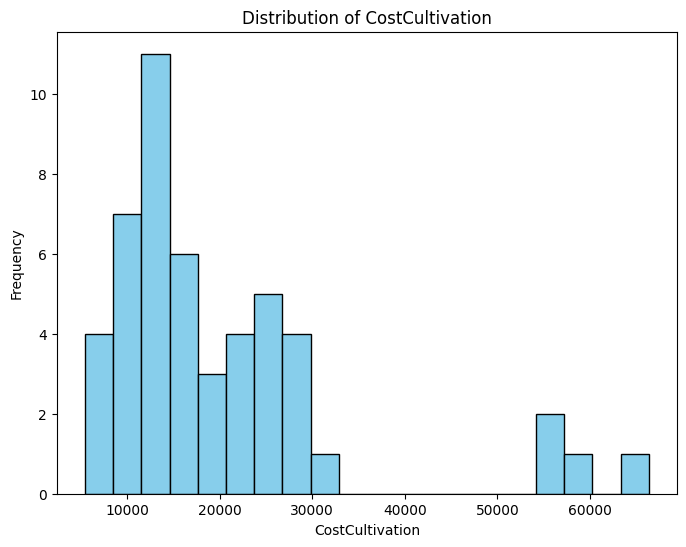

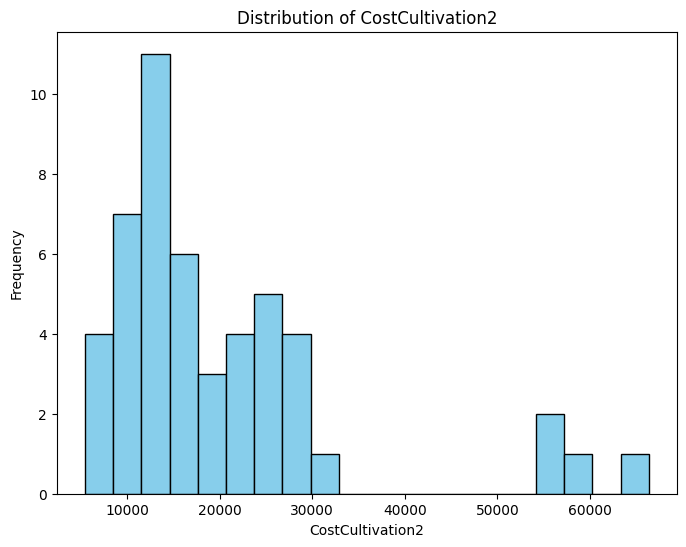

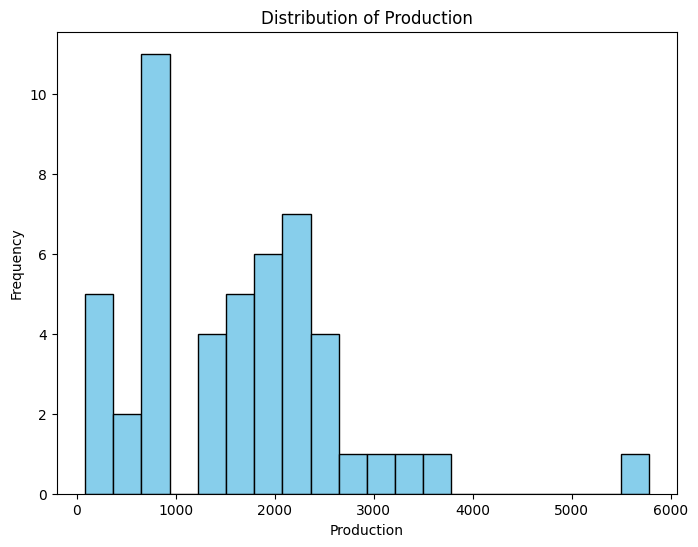

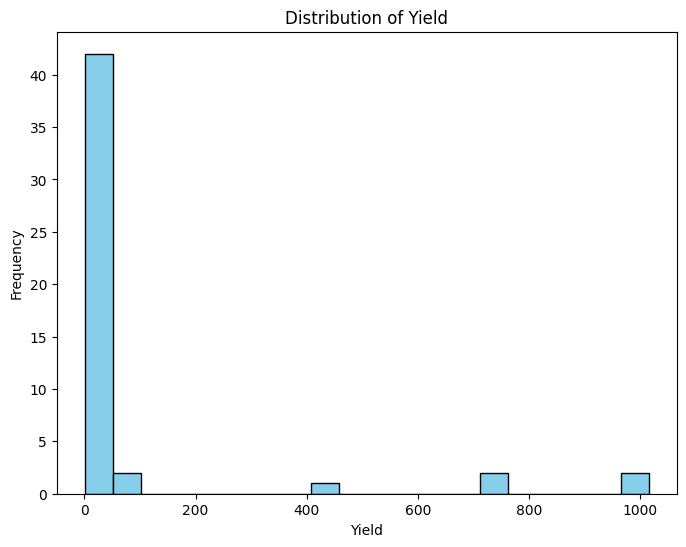

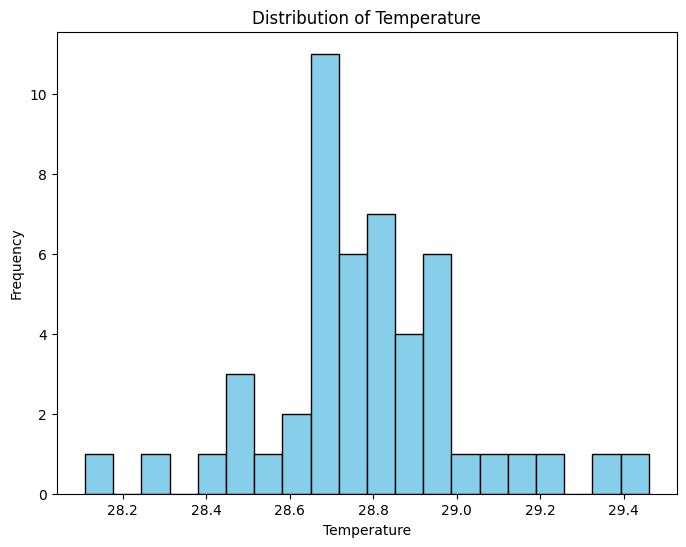

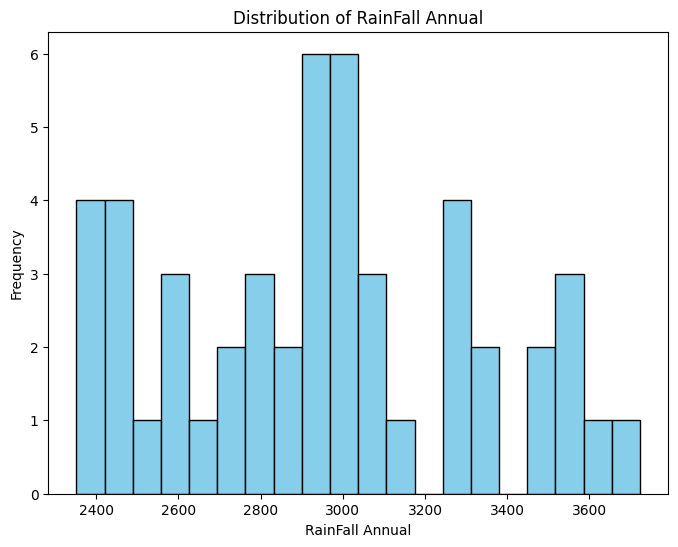

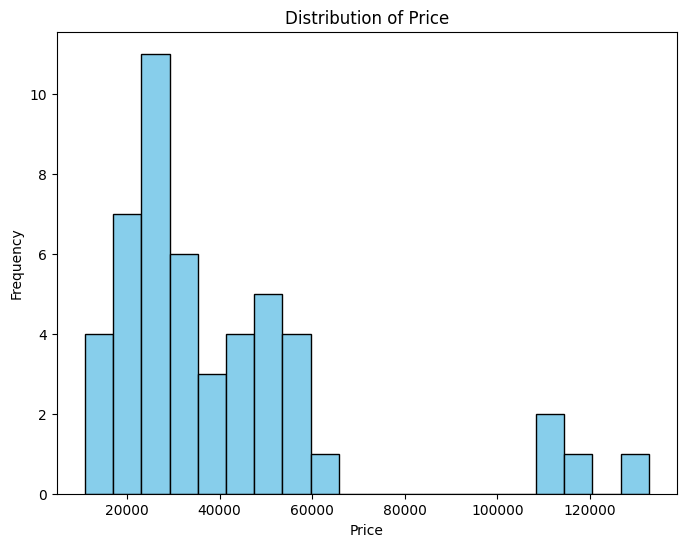

In [284]:
columns_considered = ['CostCultivation','CostCultivation2','Production','Yield','Temperature','RainFall Annual','Price'	]
for columns in columns_considered:
  plt.figure(figsize=(8,6))
  plt.hist(data[columns],bins=20,color='skyblue',edgecolor='black')
  plt.title(f'Distribution of {columns}')
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.show()

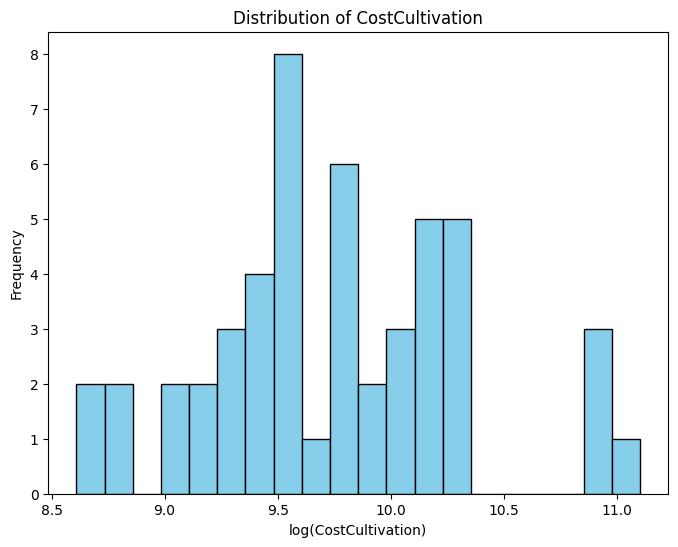

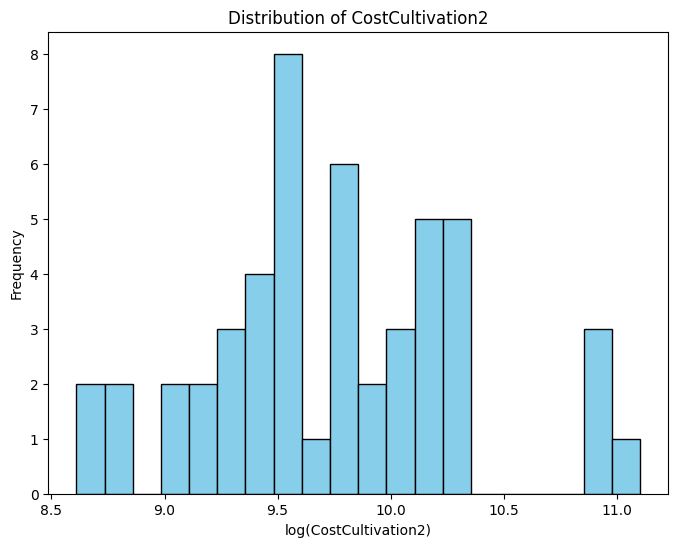

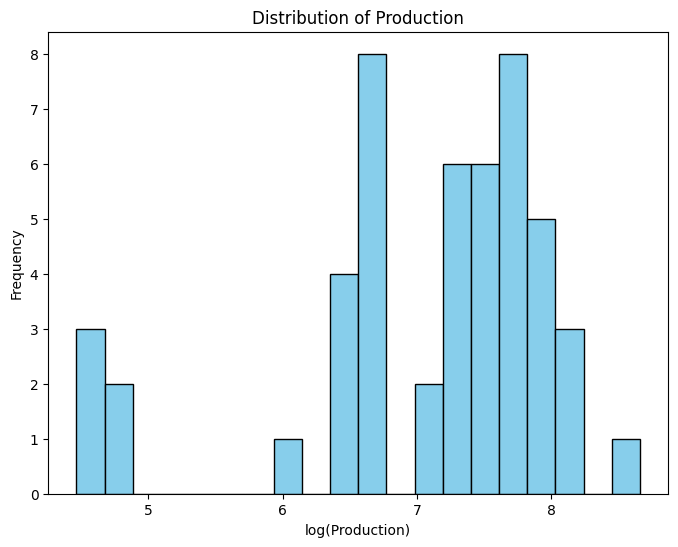

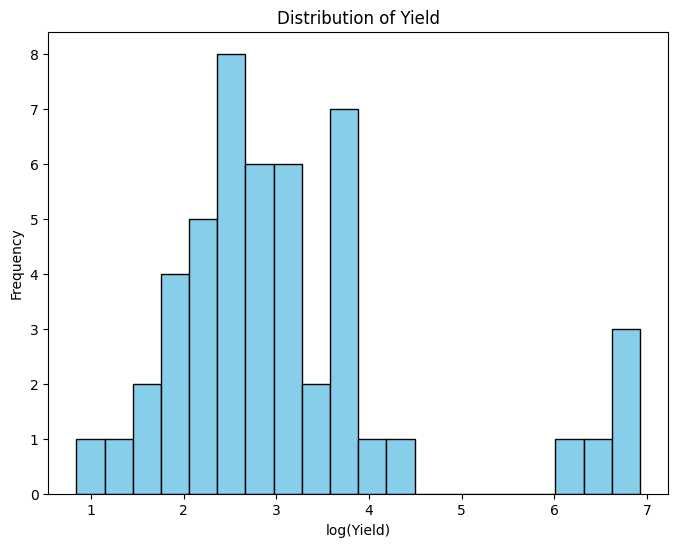

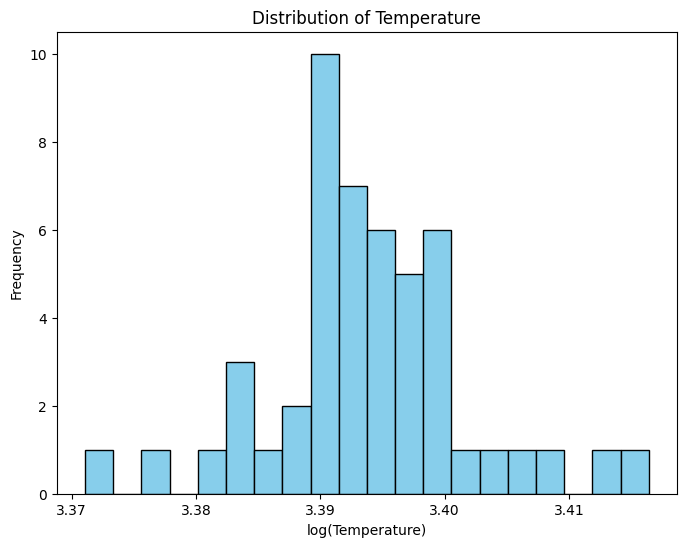

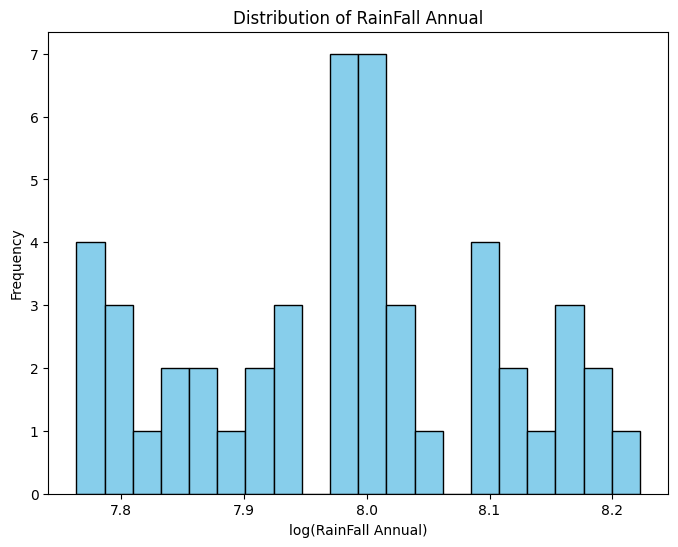

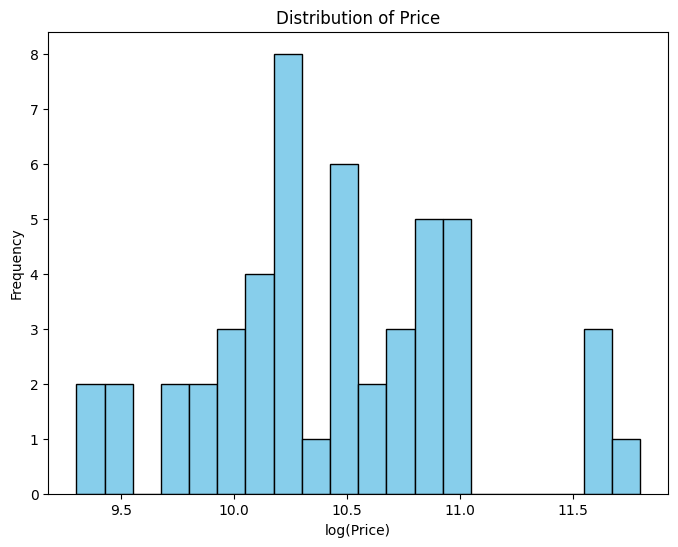

In [285]:
for columns in columns_considered:
  data[columns+'_log'] = np.log(data[columns]+1)
for columns in columns_considered:
  plt.figure(figsize=(8,6))
  plt.hist(data[columns+'_log'],bins=20,color='skyblue',edgecolor='black')
  plt.title(f'Distribution of {columns}')
  plt.xlabel(f'log({columns})')
  plt.ylabel('Frequency')
  plt.show()


In [286]:
data

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price,CostCultivation_log,CostCultivation2_log,Production_log,Yield_log,Temperature_log,RainFall Annual_log,Price_log
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10,9.189632,9.190265,7.571757,2.382320,3.399863,8.123914,9.882780
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30,9.268057,9.268152,7.684076,2.136531,3.408504,8.166699,9.961204
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64,9.508207,9.508281,7.549241,2.359910,3.383373,7.992404,10.201354
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32,9.744061,9.744120,8.208366,2.004179,3.384051,8.032880,10.437209
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10,9.748677,9.748735,7.929054,2.274186,3.377588,7.850766,10.441824
5,Maharashtra,COTTON,23711.44,23712.44,2539.47,12.69,28.73,2534.4,47423.88,10.073755,10.073797,7.840104,2.616666,3.392157,7.838107,10.766902
6,Punjab,COTTON,29047.10,29048.10,2003.76,24.39,28.65,3347.9,58095.20,10.276708,10.276743,7.603280,3.234355,3.389462,8.116387,10.969856
7,Andhra Pradesh,COTTON,29140.77,29141.77,2509.99,17.83,28.83,3576.4,58282.54,10.279928,10.279962,7.828432,2.935451,3.395515,8.182392,10.973075
8,Gujarat,COTTON,29616.09,29617.09,2179.26,19.05,28.38,2899.4,59233.18,10.296107,10.296141,7.687199,2.998229,3.380314,7.972604,10.989254
9,Haryana,COTTON,29918.97,29919.97,2127.35,19.90,28.53,2687.2,59838.94,10.306281,10.306315,7.663102,3.039749,3.385407,7.896627,10.999429


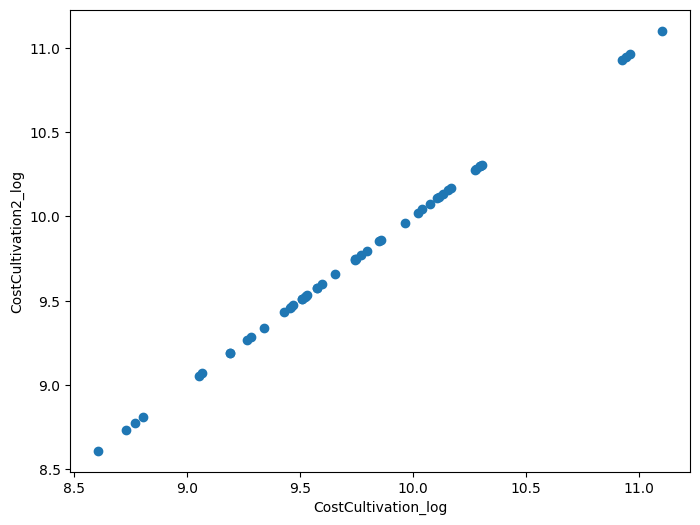

In [287]:
plt.figure(figsize =(8,6))
plt.scatter(data['CostCultivation_log'],data['CostCultivation2_log'])
plt.xlabel('CostCultivation_log')
plt.ylabel('CostCultivation2_log')
plt.show()

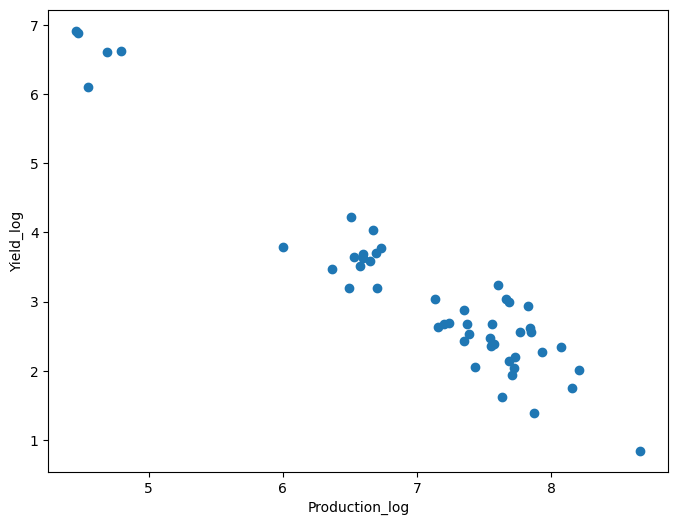

In [288]:
plt.figure(figsize=(8,6))
plt.scatter(data['Production_log'],data['Yield_log'])
plt.xlabel('Production_log')
plt.ylabel('Yield_log')
plt.show()

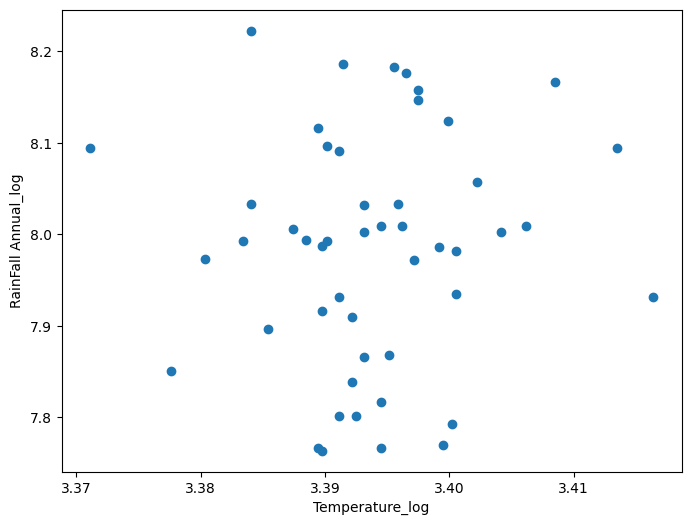

In [289]:
plt.figure(figsize=(8,6))
plt.scatter(data['Temperature_log'],data['RainFall Annual_log'])
plt.xlabel('Temperature_log')
plt.ylabel('RainFall Annual_log')
plt.show()

In [290]:
data.drop(columns = columns_considered,inplace = True)
data

,State,Crop,CostCultivation_log,CostCultivation2_log,Production_log,Yield_log,Temperature_log,RainFall Annual_log,Price_log
0,Uttar Pradesh,ARHAR,9.189632,9.190265,7.571757,2.382320,3.399863,8.123914,9.882780
1,Karnataka,ARHAR,9.268057,9.268152,7.684076,2.136531,3.408504,8.166699,9.961204
2,Gujarat,ARHAR,9.508207,9.508281,7.549241,2.359910,3.383373,7.992404,10.201354
3,Andhra Pradesh,ARHAR,9.744061,9.744120,8.208366,2.004179,3.384051,8.032880,10.437209
4,Maharashtra,ARHAR,9.748677,9.748735,7.929054,2.274186,3.377588,7.850766,10.441824
5,Maharashtra,COTTON,10.073755,10.073797,7.840104,2.616666,3.392157,7.838107,10.766902
6,Punjab,COTTON,10.276708,10.276743,7.603280,3.234355,3.389462,8.116387,10.969856
7,Andhra Pradesh,COTTON,10.279928,10.279962,7.828432,2.935451,3.395515,8.182392,10.973075
8,Gujarat,COTTON,10.296107,10.296141,7.687199,2.998229,3.380314,7.972604,10.989254
9,Haryana,COTTON,10.306281,10.306315,7.663102,3.039749,3.385407,7.896627,10.999429


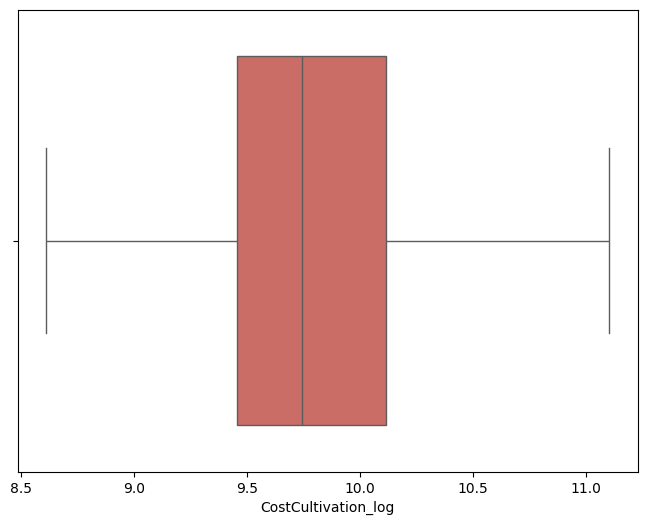

In [291]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['CostCultivation_log'],data = data,palette='hls')
plt.show()

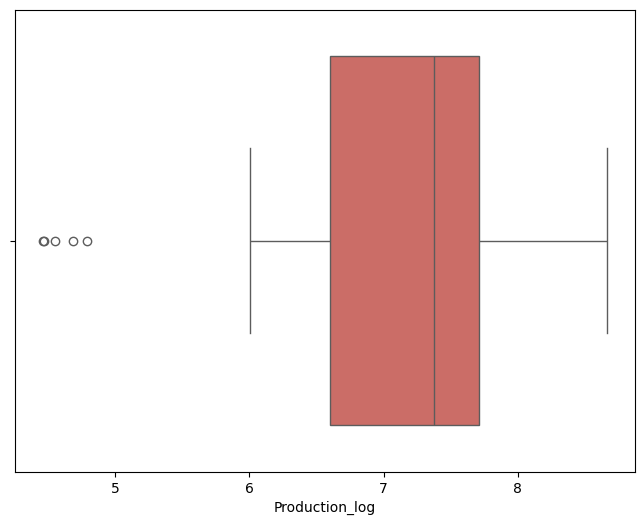

In [292]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Production_log'],data = data,palette='hls')
plt.show()

In [293]:
data.columns



Index(['State', 'Crop', 'CostCultivation_log', 'CostCultivation2_log',
       'Production_log', 'Yield_log', 'Temperature_log', 'RainFall Annual_log',
       'Price_log'],
      dtype='object')

In [294]:
data.drop('CostCultivation2_log',axis=1,inplace = True)


In [295]:
data

,State,Crop,CostCultivation_log,Production_log,Yield_log,Temperature_log,RainFall Annual_log,Price_log
0,Uttar Pradesh,ARHAR,9.189632,7.571757,2.382320,3.399863,8.123914,9.882780
1,Karnataka,ARHAR,9.268057,7.684076,2.136531,3.408504,8.166699,9.961204
2,Gujarat,ARHAR,9.508207,7.549241,2.359910,3.383373,7.992404,10.201354
3,Andhra Pradesh,ARHAR,9.744061,8.208366,2.004179,3.384051,8.032880,10.437209
4,Maharashtra,ARHAR,9.748677,7.929054,2.274186,3.377588,7.850766,10.441824
5,Maharashtra,COTTON,10.073755,7.840104,2.616666,3.392157,7.838107,10.766902
6,Punjab,COTTON,10.276708,7.603280,3.234355,3.389462,8.116387,10.969856
7,Andhra Pradesh,COTTON,10.279928,7.828432,2.935451,3.395515,8.182392,10.973075
8,Gujarat,COTTON,10.296107,7.687199,2.998229,3.380314,7.972604,10.989254
9,Haryana,COTTON,10.306281,7.663102,3.039749,3.385407,7.896627,10.999429


In [296]:
data = pd.get_dummies(data,columns = ['State','Crop'])

In [297]:
data

,CostCultivation_log,Production_log,Yield_log,Temperature_log,RainFall Annual_log,Price_log,State_Andhra Pradesh,State_Bihar,State_Gujarat,State_Haryana,...,Crop_ARHAR,Crop_COTTON,Crop_GRAM,Crop_GROUNDNUT,Crop_MAIZE,Crop_MOONG,Crop_MUSTARD,Crop_PADDY,Crop_SUGARCANE,Crop_WHEAT
0,9.189632,7.571757,2.382320,3.399863,8.123914,9.882780,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,9.268057,7.684076,2.136531,3.408504,8.166699,9.961204,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,9.508207,7.549241,2.359910,3.383373,7.992404,10.201354,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,9.744061,8.208366,2.004179,3.384051,8.032880,10.437209,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,9.748677,7.929054,2.274186,3.377588,7.850766,10.441824,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,10.073755,7.840104,2.616666,3.392157,7.838107,10.766902,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,10.276708,7.603280,3.234355,3.389462,8.116387,10.969856,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,10.279928,7.828432,2.935451,3.395515,8.182392,10.973075,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,10.296107,7.687199,2.998229,3.380314,7.972604,10.989254,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9,10.306281,7.663102,3.039749,3.385407,7.896627,10.999429,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [298]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score

In [299]:
x = data.drop('Price_log',axis=1)
y = data['Price_log']

In [300]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

In [301]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [302]:
price_pred = lr.predict(x_test)

In [303]:
pd.DataFrame({'Actual':y_test,'Predicted':price_pred})

,Actual,Predicted
13,10.164847,10.164847
45,10.123859,10.123859
47,10.544308,10.544308
44,11.795636,11.795636
17,10.714811,10.714811
27,9.463686,9.463686
26,9.426295,9.426295
25,9.302836,9.302836
31,10.461905,10.461905
19,10.862058,10.862058


In [304]:
mse = mean_squared_error(y_test,price_pred)
print(mse)
rmse = np.square(mse)
print(rmse)
mae =mean_absolute_error(y_test,price_pred)
print(mae)
r2 = r2_score(y_test,price_pred)
print(r2)

4.1020767071492615e-30
1.6827033311336529e-59
1.2434497875801752e-15
1.0


In [305]:
from sklearn.svm import SVR

In [306]:
sv_regression = SVR()
sv_regression.fit(x_train,y_train)


SVR()

In [307]:
price_pred = sv_regression.predict(x_test)

In [308]:
pd.DataFrame({'Actual':y_test,'Predicted':price_pred})

,Actual,Predicted
13,10.164847,10.267467
45,10.123859,10.409117
47,10.544308,10.506352
44,11.795636,11.210558
17,10.714811,10.424717
27,9.463686,9.990987
26,9.426295,10.063588
25,9.302836,10.046639
31,10.461905,10.550324
19,10.862058,10.430358


In [309]:
mse = mean_squared_error(y_test,price_pred)
print(mse)
rmse = np.square(mse)
print(rmse)
mae =mean_absolute_error(y_test,price_pred)
print(mae)
r2 = r2_score(y_test,price_pred)
print(r2)

0.19514299108696845
0.038080786970368645
0.3729521840732902
0.6328629397198323
